## Student Detials
> Title= "Mr"\
> Name= "Ali Nawaz"\
> email = "nawazktk99@gmail.com"\
> whatsapp = "03358043653"

## K-Nearest Neighbors

KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.

### How does the KNN algorithm work?
In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.



![Diagram Decsion Tree](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png)

Suppose P1 is the point, for which label needs to predict. First, you find the k closest point to P1 and then classify points by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction. For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. KNN has the following basic steps:

1. Calculate distance
2. Find closest neighbors
3. Vote for labels


![How Decsion Trree works](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)

### For More Information visit ([More Details](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn))

In [30]:
# import all the lib
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
# read the dataset using pandas

In [31]:
# print the names of the features
df = pd.read_csv('D:/Python ka Chilla/python_chilla/data/mldata.csv')

print(df.columns)

Index(['age', 'weight', 'gender', 'height', 'likeness'], dtype='object')


C:\Users\Ali\anaconda3\envs\python-chilla\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


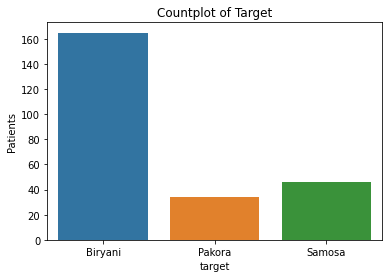

In [45]:
# print the label species(class_0, class_1, class_2)
#2. distribution of target variable.
sns.countplot(df['likeness'])

# Add labels
plt.title('Countplot of Target')
plt.xlabel('target')
plt.ylabel('Patients')
plt.show()

In [33]:
df.head()

,age,weight,gender,height,likeness
0,27,76.0,Male,170.688,Biryani
1,41,70.0,Male,165.000,Biryani
2,29,80.0,Male,171.000,Biryani
3,27,102.0,Male,173.000,Biryani
4,29,67.0,Male,164.000,Biryani


In [34]:
 #split dataset in features and target variable
df['gender'] = df['gender'].replace('Male',  1) 
df['gender'] = df['gender'].replace('Female',  0) 
feature_cols = ['age', 'gender', 'weight']
X = df[feature_cols] # Features
y = df.likeness # Target variable

In [35]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [36]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [46]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

In [47]:
## score that comes from the testing set only
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 64.86486486486487 and k = [11, 13, 14, 15, 16, 17, 18, 19, 20]


In [37]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6081081081081081


### Re-generating Model for K=7
Let's build KNN classifier model for k=7.

In [38]:


#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [39]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6351351351351351


In [40]:
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6351351351351351


In [41]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5675675675675675


## Locate K value for our dataset

In [42]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.4864864864864865, 0.6351351351351351, 0.5675675675675675, 0.5945945945945946, 0.6081081081081081, 0.5945945945945946, 0.6351351351351351, 0.6351351351351351, 0.6216216216216216, 0.6351351351351351, 0.6486486486486487, 0.6351351351351351, 0.6486486486486487, 0.6486486486486487, 0.6486486486486487, 0.6486486486486487, 0.6486486486486487, 0.6486486486486487, 0.6486486486486487, 0.6486486486486487, 0.6486486486486487, 0.6486486486486487, 0.6486486486486487, 0.6486486486486487, 0.6486486486486487]


Text(0, 0.5, 'Testing Accuracy')

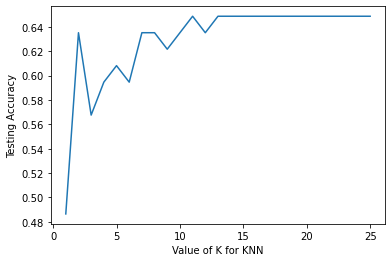

In [43]:
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Other Eval Measure

In [48]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,Biryani,All
Actual,,
Biryani,48,48
Pakora,12,12
Samosa,14,14
All,74,74


In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
roc_auc_score(y_test, y_pred_proba)

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Knn(n_neighbors = 8) PRC curve')
plt.show()

In [ ]:
# calculate precision-recall AUC
auc_prc = auc(recall, precision)
print(auc_prc)

### Pros
The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms. There is no need to train a model for generalization, That is why KNN is known as the simple and instance-based learning algorithm. KNN can be useful in case of nonlinear data. It can be used with the regression problem. Output value for the object is computed by the average of k closest neighbors value.

### Cons
The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory. It requires large memory for storing the entire training dataset for prediction. KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also not suitable for large dimensional data.